In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Load the dataset into a pandas datFrame and answer the following questions:
df = pd.read_csv('diabetes.txt', delimiter="\t")
# Describe the structure of the diabetes dataset (size, features, data types)
# I added some additional information retrieveal for my own edification
print(df.info())
print(df.isna().sum())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB
None
AGE    0
SEX    0
BMI    0
BP     0
S1     0
S2     0
S3     0
S4     0
S5     0
S6     0
Y      0
dtype: int64


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


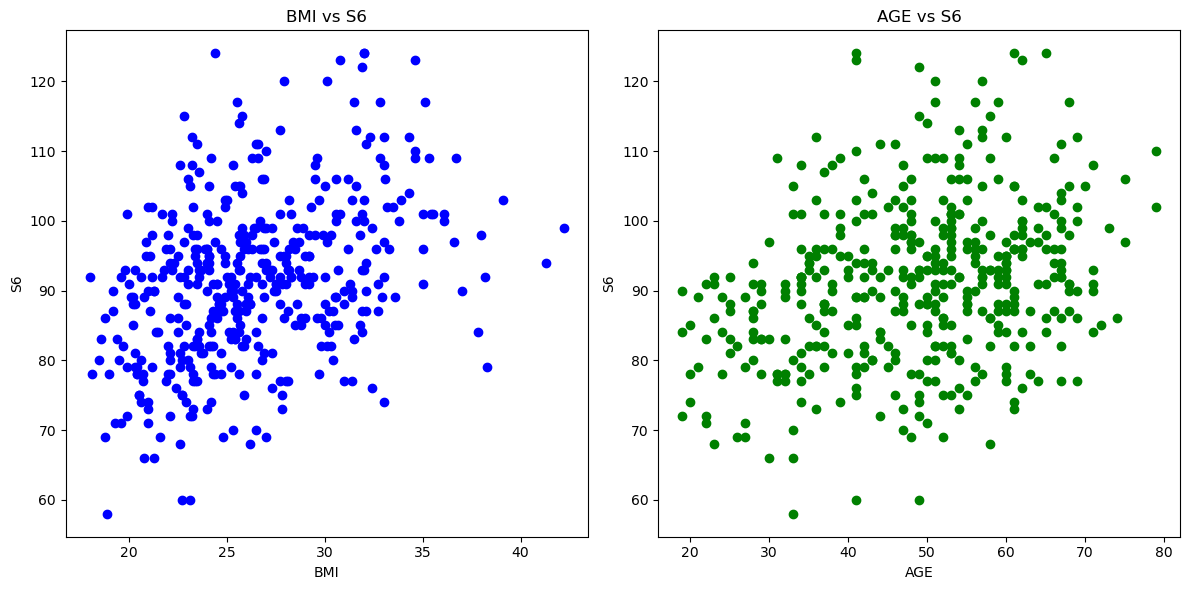

In [10]:
# Show the relationships between the target variable and the features using scatter plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['BMI'], df['S6'], color='blue')
plt.xlabel('BMI')
plt.ylabel('S6')
plt.title('BMI vs S6')

plt.subplot(1, 2, 2)
plt.scatter(df['AGE'], df['S6'], color='green')
plt.xlabel('AGE')
plt.ylabel('S6')
plt.title('AGE vs S6')

plt.tight_layout()
plt.show()

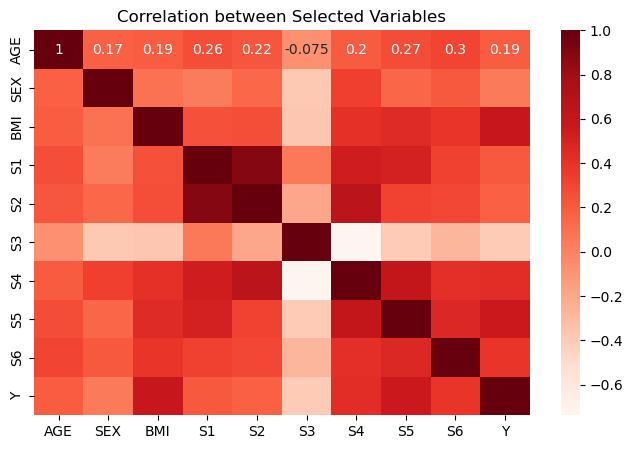

In [5]:
# Show the relationships between the target variable and the features using a correlation analysis
corr_matrix = df[['AGE', 'SEX', 'BMI', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y']].corr()
plt.figure(figsize=[8, 5])
sns.heatmap(corr_matrix, annot=True, cmap='Reds')
plt.title('Correlation between Selected Variables')
plt.show()

In [6]:
# Build a Simple Linear Regression Model (Single Feature):
# 1. Choose a single feature(x) (body mass index) as the predictor variable
#    and the s6 glu, blood sugar level as the target variable(y)
x, y = df[['BMI']], df['S6']

# 2. Split the dataset into training and test sets.
# x and y are the datasets, or arrays, to be trained on. Test size is 20%, therefore the sample size for training is 80%.
# setting a value for random_state will ensure that randomization is "seeded" so results of the dataset split 
# for testing and training will remain the same for comparability (I chose 50 arbitrarily)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

# 3. Train a simple linear regression model using the training data
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# 4. Evaluate the model's accuracy using metrics such as mean squared error (MSE) or R-squared
#    on both the training and testing sets.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Information for myself:
# mse - measures the average squared difference between the actual and predicted values.
#     - lower means that the model's predictions are closer to the actual values, but it is scalable
#       so higher numbers for larger datasets are more reasonable and acceptable than higher numbers for smaller datasets.
#     - mse is generally compared across models rather than by the value itself.
# R-squared score - measures the proportion of the variance in the dependent variable that is predictable from the independent variables.
#                 - it ranges from 0 to 1, where higher values indicate better model performance
#                 - Closer to 1 is better: An R² score closer to 1 means that a large proportion of the variance in the
#                   dependent variable is explained by the independent variables.
#                 - > 0.7: Generally a good model, 0.5 - 0.7: moderate level of predictive accuracy, <0.5: model does not explain the variance
print(f'Mean squared error: {mse}\tR-squared score: {r2}')

Mean squared error: 86.04805487833002	R-squared score: 0.15344943488754403


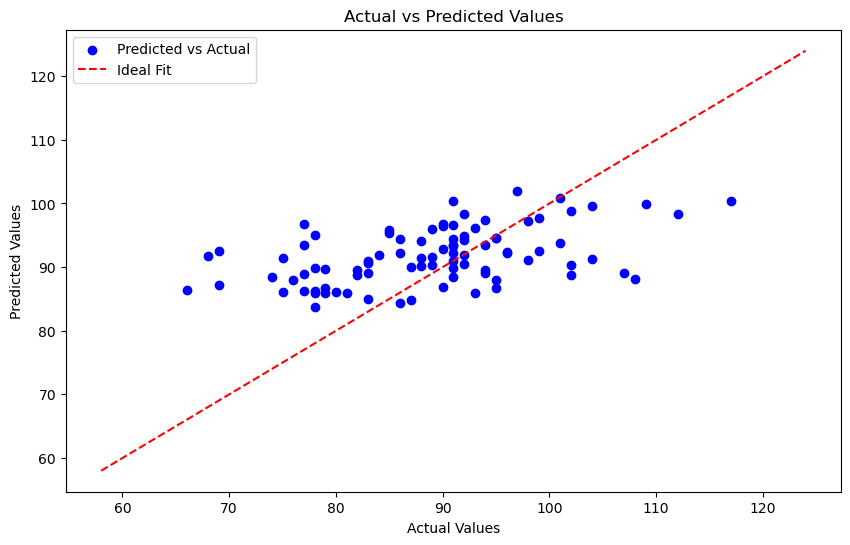

In [7]:
# 5. Visualize the actual vs. predicted values of the target variable on the testing set.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [13]:
# Build a Simple Linear Regression Model (Two Features):
# 1. Select two features (body mass index and age in years) as predictor variables
#    and the s6 glu, blood sugar level as the target variable
x, y = df[['BMI', 'AGE']], df['S6']

# 2. Split the dataset into training and test sets. Train a simple linear regression model using the training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=50)

# 3. Asses the model's accuracy using metrics such as MSE or R-squared on both the training and testing sets.
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean squared error: {mse}\tR-squared score: {r2}')

Mean squared error: 92.7336017644167	R-squared score: 0.21593189059589746


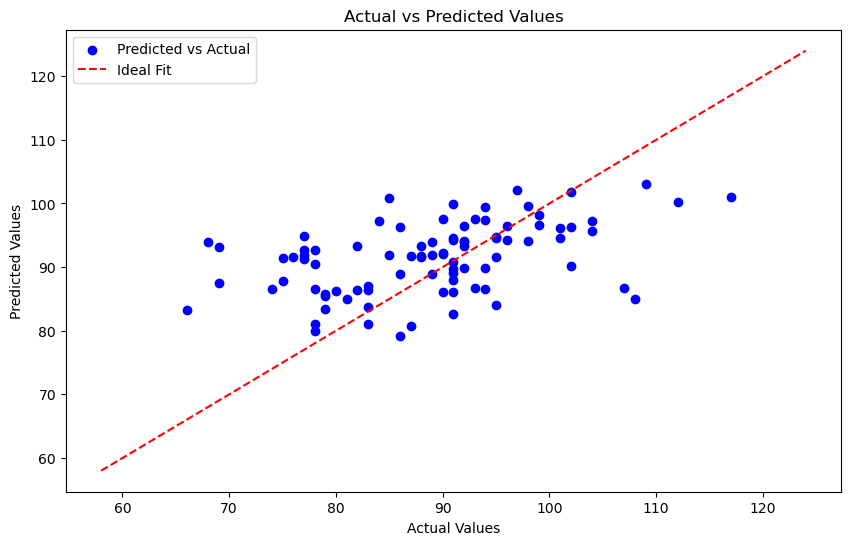

In [9]:
# 4. Visualize the actual vs. predicted values of the target variable on the testing set.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()